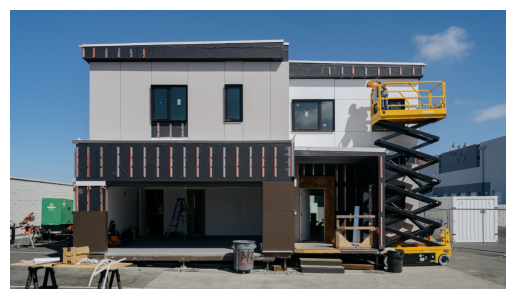

In [16]:
import matplotlib.pyplot as plt
import cv2

# Read the image
image_path = "image.jpg"  # Replace "path_to_your_image.jpg" with the path to your image
image = cv2.imread(image_path)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.show()


In [3]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import cv2
import numpy as np
from PIL import Image, ImageTk

# Function to apply selected filter
def apply_filter(image, filter_type):
    if filter_type == "Blur":
        return cv2.blur(image, (5, 5))
    elif filter_type == "Edge Detection":
        return cv2.Canny(image, 100, 200)
    elif filter_type == "Sharpen":
        sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        return cv2.filter2D(image, -1, sharpen_kernel)
    elif filter_type == "Noise Reduction":
        return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    elif filter_type == "Median Filter":
        return cv2.medianBlur(image, 5)
    elif filter_type == "Mean Filter":
        mean_kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
        return cv2.filter2D(image, -1, mean_kernel)
    elif filter_type == "Gaussian Filter":
        return cv2.GaussianBlur(image, (5, 5), 0)
    elif filter_type == "Laplacian Filter":
        laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        return cv2.filter2D(image, -1, laplacian_kernel)
    elif filter_type == "Box Filter":
        return cv2.boxFilter(image, -1, (5, 5))

# Function to handle button click
def on_apply_filter():
    global image_path, filter_choice_var, image_before_label, image_after_label

    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize images
    image_rgb_resized = cv2.resize(image_rgb, (500, 500))
    filtered_image_resized = cv2.resize(apply_filter(image, filter_choice_var.get()), (500, 500))

    # Display the original image
    image_before_label.config(image=None)
    image_before_label.image = ImageTk.PhotoImage(image=Image.fromarray(image_rgb_resized))
    image_before_label.config(image=image_before_label.image)

    # Display the filtered image
    image_after_label.config(image=None)
    image_after_label.image = ImageTk.PhotoImage(image=Image.fromarray(filtered_image_resized))
    image_after_label.config(image=image_after_label.image)

# Function to open file dialog and get image path
def open_image():
    global image_path
    image_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])

# Create the main window
root = tk.Tk()
root.title("Image Filter App")
root.configure(background="#f0f0f0")

# Set minimum size for the window
root.minsize(740, 580)

# Create labels for original and filtered images
image_before_label = tk.Label(root, bg="#f0f0f0")
image_before_label.grid(row=0, column=0, padx=10, pady=10)
image_after_label = tk.Label(root, bg="#f0f0f0")
image_after_label.grid(row=0, column=1, padx=10, pady=10)

# Create dropdown for filter choice
filters = ["Blur", "Edge Detection", "Sharpen", "Noise Reduction", "Median Filter",
           "Mean Filter", "Gaussian Filter", "Laplacian Filter", "Box Filter"]
filter_choice_var = tk.StringVar(root)
filter_choice_var.set(filters[0])  # Set default value
filter_dropdown = ttk.Combobox(root, textvariable=filter_choice_var, values=filters, state="readonly", width=20)
filter_dropdown.grid(row=1, column=0, columnspan=2, padx=10, pady=5)

# Create button to open file dialog
open_button = tk.Button(root, text="Open Image", command=open_image, bg="#008CBA", fg="white", borderwidth=0)
open_button.grid(row=2, column=0, columnspan=2, padx=10, pady=5, sticky="ew")

# Create button to apply filter
apply_button = tk.Button(root, text="Apply Filter", command=on_apply_filter, bg="#008CBA", fg="white", borderwidth=0)
apply_button.grid(row=3, column=0, columnspan=2, padx=10, pady=5, sticky="ew")

# Set weights for row and column resizing
root.grid_rowconfigure(0, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=1)

# Start the GUI event loop
root.mainloop()
